In [28]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('listings.csv')

In [3]:
#check the dataset's info to decide what should be include in our subset
#data.info()

In [4]:
#make subset for linear predicting
data_v1 = data[['neighbourhood','city','is_location_exact','host_is_superhost','property_type','room_type'
            ,'instant_bookable','cancellation_policy','latitude','longitude','accommodates','bathrooms'
            ,'bedrooms','extra_people','minimum_nights','maximum_nights'
            ,'security_deposit','price']]

In [5]:
data_v1.head(5)

,neighbourhood,city,is_location_exact,host_is_superhost,property_type,room_type,instant_bookable,cancellation_policy,latitude,longitude,accommodates,bathrooms,bedrooms,extra_people,minimum_nights,maximum_nights,security_deposit,price
0,Queen Anne,Seattle,t,f,Apartment,Entire home/apt,f,moderate,47.636289,-122.371025,4,1.0,1.0,$5.00,1,365,NaN,$85.00
1,Queen Anne,Seattle,t,t,Apartment,Entire home/apt,f,strict,47.639123,-122.365666,4,1.0,1.0,$0.00,2,90,$100.00,$150.00
2,Queen Anne,Seattle,t,f,House,Entire home/apt,f,strict,47.629724,-122.369483,11,4.5,5.0,$25.00,4,30,"$1,000.00",$975.00
3,Queen Anne,Seattle,t,f,Apartment,Entire home/apt,f,flexible,47.638473,-122.369279,3,1.0,0.0,$0.00,1,1125,NaN,$100.00
4,Queen Anne,Seattle,t,f,House,Entire home/apt,f,strict,47.632918,-122.372471,6,2.0,3.0,$15.00,1,1125,$700.00,$450.00


In [6]:
data_v1.isnull().sum()

neighbourhood           416
city                      0
is_location_exact         0
host_is_superhost         2
property_type             1
room_type                 0
instant_bookable          0
cancellation_policy       0
latitude                  0
longitude                 0
accommodates              0
bathrooms                16
bedrooms                  6
extra_people              0
minimum_nights            0
maximum_nights            0
security_deposit       1952
price                     0
dtype: int64

In [7]:
print('The percentage of missing values of security_deposit column: ')
print(1952/3818)

The percentage of missing values of security_deposit column: 
0.5112624410686223


In [8]:
#based on the percentage, we decide to drop the security_deposit col
data_v2 = data_v1.drop(columns = 'security_deposit')

In [9]:
#check the value counts of neighbourhood
data_v2.neighbourhood.value_counts()

Capitol Hill          351
Ballard               213
Belltown              204
Minor                 192
Queen Anne            187
                     ... 
Pike Market             2
South Beacon Hill       2
Fairmount Park          1
Roxhill                 1
North College Park      1
Name: neighbourhood, Length: 81, dtype: int64

In [10]:
#drop neighbourhood because the values are too separate
data_v3 = data_v2.drop(columns = 'neighbourhood')

In [11]:
data_v3.property_type.value_counts()

House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

In [12]:
#extract the most popular property type
data_v4 = data_v3[(data_v3['property_type']=='House') | (data_v3['property_type']=='Apartment') | (data_v3['property_type'] == 'Townhouse')
                 |(data_v3['property_type']=='Condominium')|(data_v3['property_type']=='Loft')]


In [13]:
#drop any missing values
data_v5 = data_v4.dropna(axis=0,how='any')

In [14]:
data_v5.city.value_counts()

Seattle                  3660
West Seattle                2
Seattle                     2
Ballard, Seattle            1
seattle                     1
西雅图                         1
Phinney Ridge Seattle       1
Name: city, dtype: int64

In [15]:
data_v6 = data_v5[(data_v5['city']=='Seattle')]

In [16]:
#One hot encoding for categorical values:
#1.
is_location_exactMap = {elem:index for index,elem in enumerate(set(data_v6["is_location_exact"]))}
data_v6["is_location_exact"] = data_v6["is_location_exact"].map(is_location_exactMap)

#2.
host_is_superhostMap = {elem:index for index,elem in enumerate(set(data_v6["host_is_superhost"]))}
data_v6["host_is_superhost"] = data_v6["host_is_superhost"].map(host_is_superhostMap)

#3.
instant_bookableMap = {elem:index for index,elem in enumerate(set(data_v6["instant_bookable"]))}
data_v6["instant_bookable"] = data_v6["instant_bookable"].map(instant_bookableMap)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docu

In [17]:
#label encoding:
from sklearn.preprocessing import LabelEncoder
data_v6[['property_type','room_type','cancellation_policy']] = data_v6[['property_type','room_type','cancellation_policy']].apply(LabelEncoder().fit_transform)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [19]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
#1.
accommodates_param = std.fit(data_v6['accommodates'].values.reshape(-1, 1))
data_v6['accommodates'] = std.fit_transform(data_v6['accommodates'].values.reshape(-1, 1), accommodates_param)

#2.
bathrooms_param = std.fit(data_v6['bathrooms'].values.reshape(-1, 1))
data_v6['bathrooms'] = std.fit_transform(data_v6['bathrooms'].values.reshape(-1, 1), bathrooms_param)

#3.
bedrooms_param = std.fit(data_v6['bedrooms'].values.reshape(-1, 1))
data_v6['bedrooms'] = std.fit_transform(data_v6['bedrooms'].values.reshape(-1, 1), bedrooms_param)

#4.
minimum_nights_param = std.fit(data_v6['minimum_nights'].values.reshape(-1, 1))
data_v6['minimum_nights'] = std.fit_transform(data_v6['minimum_nights'].values.reshape(-1, 1), minimum_nights_param)

#5.
maximum_nights_param = std.fit(data_v6['maximum_nights'].values.reshape(-1, 1))
data_v6['maximum_nights'] = std.fit_transform(data_v6['maximum_nights'].values.reshape(-1, 1), maximum_nights_param)

#6.
latitude_param = std.fit(data_v6['latitude'].values.reshape(-1, 1))
data_v6['latitude'] = std.fit_transform(data_v6['latitude'].values.reshape(-1, 1), latitude_param)

#7.
longitude_param = std.fit(data_v6['longitude'].values.reshape(-1, 1))
data_v6['longitude'] = std.fit_transform(data_v6['longitude'].values.reshape(-1, 1), longitude_param)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

In [31]:
#striping extra_peopel and price cols
def dollar_sign_replace(xstr):
    return xstr.replace('$','')
def comma_replace(xstr):
    return xstr.replace(',','')

In [32]:
#1
data_v6['price'] = data_v6['price'].apply(dollar_sign_replace)
data_v6['extra_people'] = data_v6['extra_people'].apply(dollar_sign_replace)
#2
data_v6['price'] = data_v6['price'].apply(comma_replace)
data_v6['extra_people'] = data_v6['extra_people'].apply(comma_replace)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

In [36]:
#cast the above two variables into float type
data_v6[['extra_people','price']] = data_v6[['extra_people','price']].astype(int)

In [40]:
#standardized the last two cols:
#1
extra_people_param = std.fit(data_v6['extra_people'].values.reshape(-1, 1))
data_v6['extra_people'] = std.fit_transform(data_v6['extra_people'].values.reshape(-1, 1), extra_people_param)

#2
price_param = std.fit(data_v6['price'].values.reshape(-1, 1))
data_v6['price'] = std.fit_transform(data_v6['price'].values.reshape(-1, 1), price_param)



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [55]:
data_v6 = data_v6.drop(columns = 'city')
data_v6.head(3)

,is_location_exact,host_is_superhost,property_type,room_type,instant_bookable,cancellation_policy,latitude,longitude,accommodates,bathrooms,bedrooms,extra_people,minimum_nights,maximum_nights,price
0,1,0,0,0,0,1,0.168142,-1.202974,0.311967,-0.458886,-0.363202,-0.325113,-0.084131,-0.245880,-0.482516
1,1,1,0,0,0,2,0.234568,-1.033381,0.311967,-0.458886,-0.363202,-0.608656,-0.024073,-0.406191,0.238399
2,1,0,2,0,0,2,0.014274,-1.154172,3.829840,5.771462,4.131537,0.809057,0.096044,-0.441167,9.388473


In [56]:
from sklearn import model_selection
y = data_v6.price
x = data_v6.drop(columns = ['price'], axis =1)

#split into train and test set
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.25,random_state = 42)

In [57]:
#build baseline model
from sklearn.dummy import DummyRegressor
dr = DummyRegressor()
dr.fit(x_train,y_train)
dr.score(x_test,y_test)
#negative means bad model

-0.004069782140361244

In [53]:
from sklearn.linear_model import LinearRegression

In [60]:
#build linear model
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [61]:
#check the testingset result
lr.score(x_test,y_test)

0.5177056163004196

In [62]:
lr.coef_

array([ 0.01443249,  0.006824  , -0.05249266, -0.40048056, -0.07598899,
        0.01704322, -0.03091976, -0.05883919,  0.19551052,  0.2351776 ,
        0.28126436,  0.02773735, -0.01130773, -0.00334708])

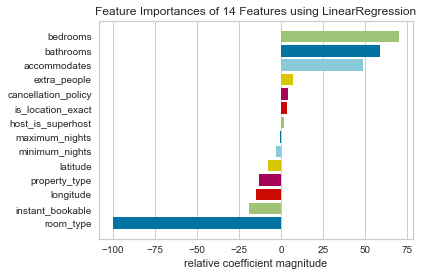

In [65]:
#check the feature importance
import matplotlib.pyplot as plt
from yellowbrick.features import FeatureImportances
fig, ax = plt.subplots(figsize = (6,4))
fi_viz = FeatureImportances(lr, labels = x.columns)
fi_viz.fit(x,y)
fi_viz.poof()